<a href="https://colab.research.google.com/github/SayantanM7/AIexpert-mod1/blob/main/mod1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0


In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Converts 28x28 to 784
    layers.Dense(128, activation='relu'),      # Hidden layer with ReLU activation
    layers.Dense(10, activation='softmax')     # Output layer: 10 classes with softmax
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
# Train the model for 5 epochs
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8773 - loss: 0.4319
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9640 - loss: 0.1211
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9763 - loss: 0.0787
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9825 - loss: 0.0577
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9863 - loss: 0.0450


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0919
Test accuracy: 0.9769


In [8]:
# Predict probabilities for test images
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


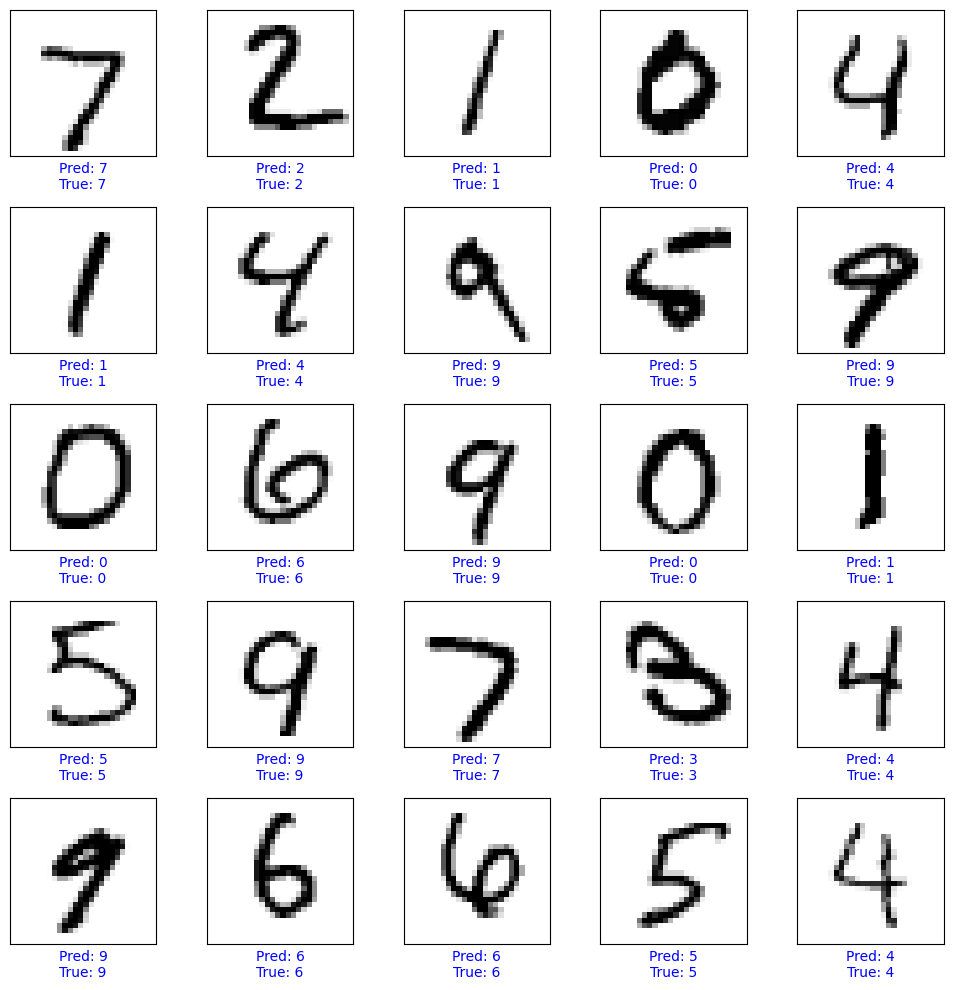

In [9]:
num_images = 25
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)

    predicted_label = predictions[i].argmax()
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)

plt.tight_layout()
plt.show()
